In [273]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from library.sb_utils import save_file
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [274]:
pooldata=pd.read_csv('clean_pool.csv', sep=',')

In [275]:
pooldata.head()

,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Human Counter,temperature,water level,Human Diff
0,2022-11-01 04:00:06.605000+00:00,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,74.2574,500.0,0.0
1,2022-11-01 04:00:16.661000+00:00,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,74.2574,500.0,0.0
2,2022-11-01 04:00:26.768000+00:00,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,74.2574,500.0,0.0
3,2022-11-01 04:00:36.834000+00:00,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,74.2574,500.0,0.0
4,2022-11-01 04:00:46.936000+00:00,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,74.2574,500.0,0.0


In [276]:
pooldata=pooldata.sort_values(by='time_stamp')

In [277]:
pooldata.set_index('time_stamp',inplace=True)

In [278]:
pooldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43604 entries, 2022-11-01 04:00:06.605000+00:00 to 2022-11-08 04:59:54.377000+00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salinity       43604 non-null  float64
 1   turbidity      43604 non-null  float64
 2   ORP            43604 non-null  float64
 3   PH             43604 non-null  float64
 4   TDS            43604 non-null  float64
 5   Pressure in    43604 non-null  float64
 6   Pressure out   43604 non-null  float64
 7   pump current   43604 non-null  float64
 8   Human Counter  43604 non-null  float64
 9   temperature    43604 non-null  float64
 10  water level    43604 non-null  float64
 11  Human Diff     43604 non-null  float64
dtypes: float64(12)
memory usage: 4.3+ MB


In [279]:
pooldata.head()

,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Human Counter,temperature,water level,Human Diff
time_stamp,,,,,,,,,,,,
2022-11-01 04:00:06.605000+00:00,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,74.2574,500.0,0.0
2022-11-01 04:00:16.661000+00:00,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,74.2574,500.0,0.0
2022-11-01 04:00:26.768000+00:00,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,74.2574,500.0,0.0
2022-11-01 04:00:36.834000+00:00,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,74.2574,500.0,0.0
2022-11-01 04:00:46.936000+00:00,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,74.2574,500.0,0.0


In [280]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = 'PH', y = col, data=pooldata.reset_index(), alpha=0.5)
        ax.set(xlabel='PH', ylabel=col)
        ax.tick_params(axis='x', labelrotation=45)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

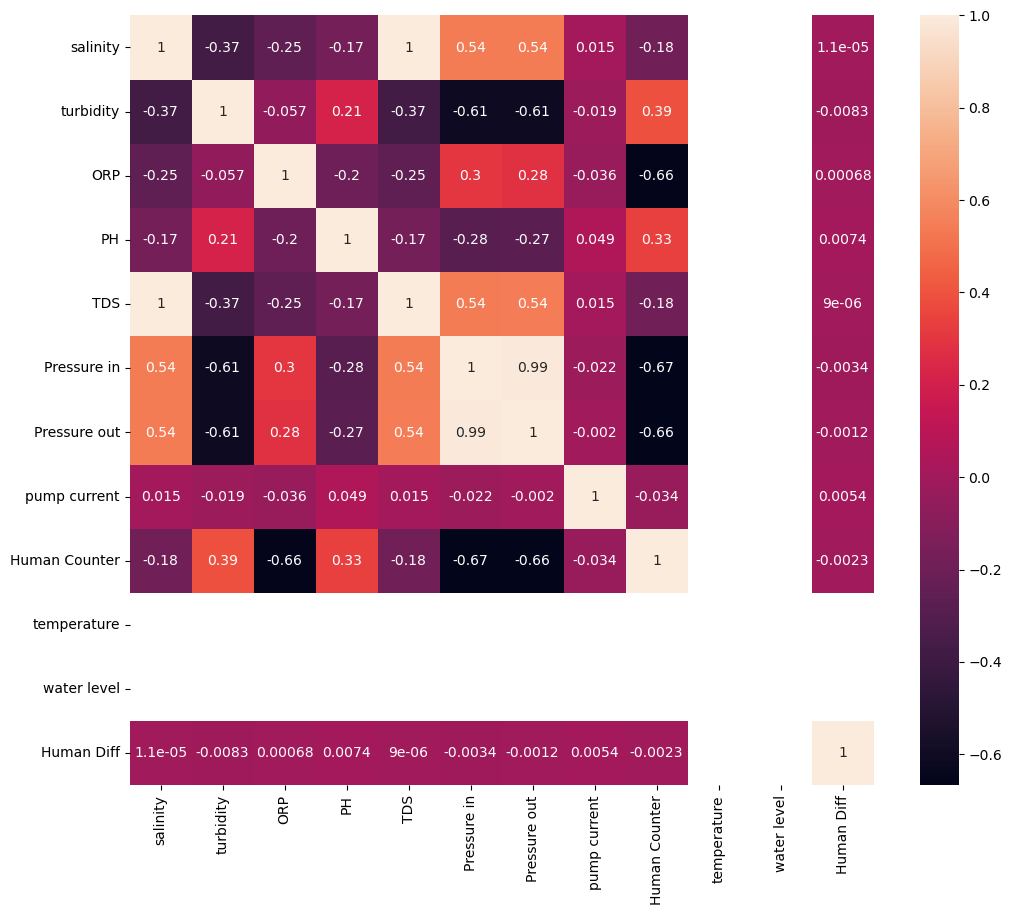

In [281]:
plt.subplots(figsize=(12,10))
sns.heatmap(pooldata.corr(),annot=True);

In [282]:
pooldata.drop('Human Diff',inplace=True, axis=1)

In [283]:
colume=['salinity','turbidity','ORP','TDS','Pressure in','Pressure out','pump current','Human Counter','temperature','water level']

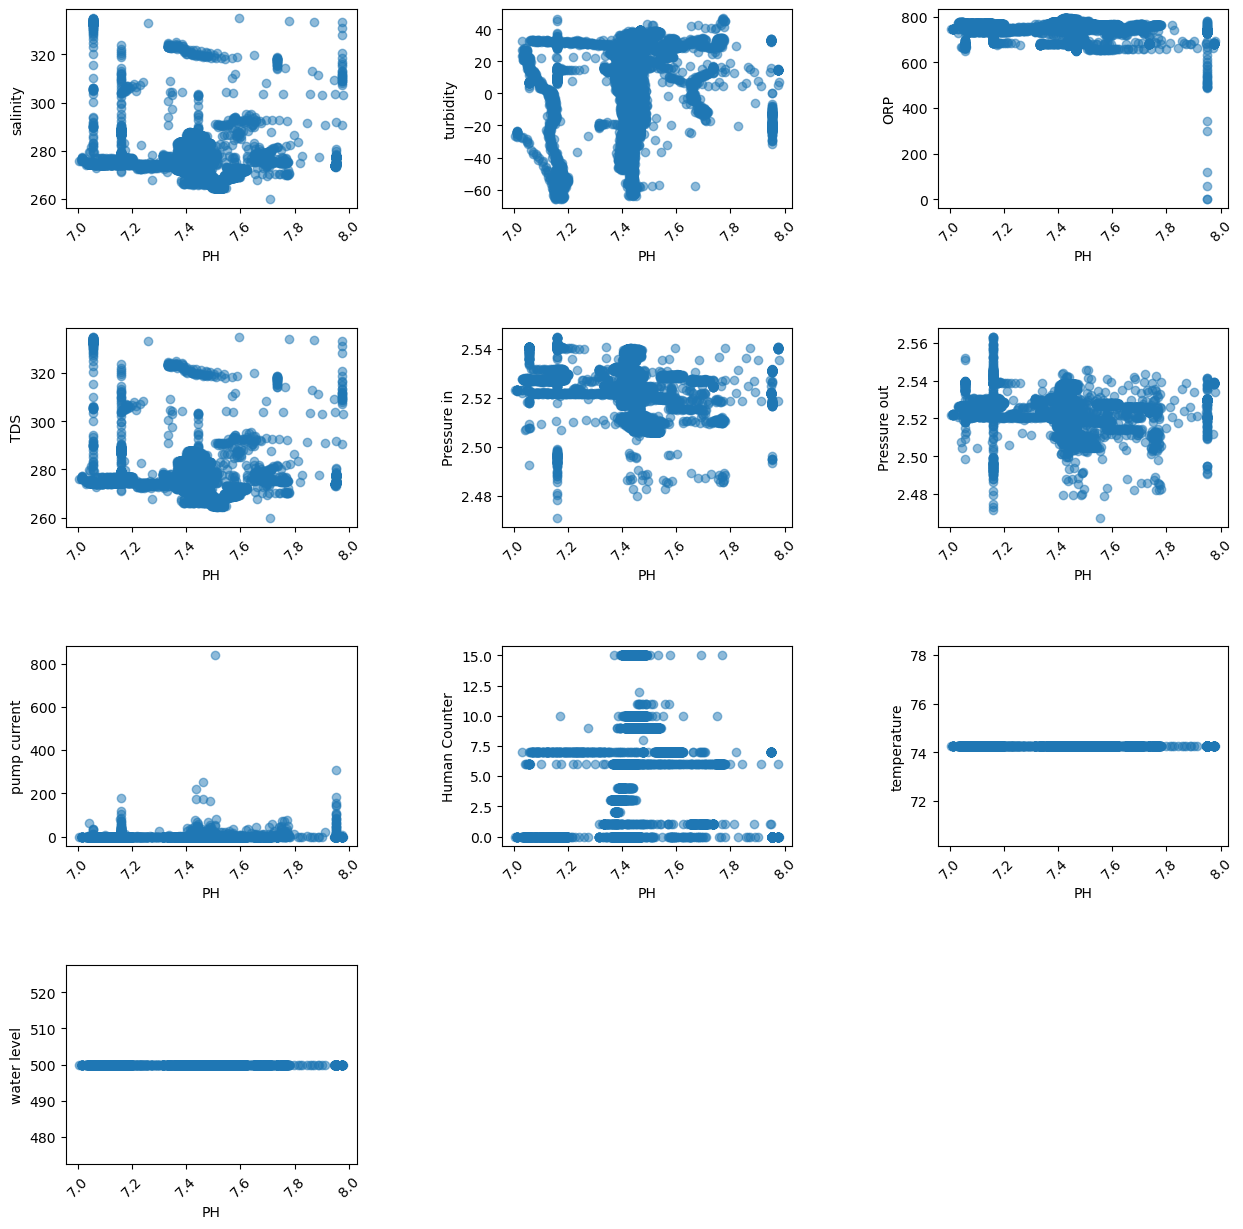

In [284]:
scatterplots(colume, ncol=3,figsize=(15, 15))

In [285]:
def test_model(model_type, X_train, y_train, X_test,y_test):
    model = model_type.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    plt.scatter(y_test,y_pred)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    return (mse,r2)

# Training Models

In [286]:
pooldata.drop(['Human Counter'],inplace=True, axis=1)

In [287]:
X = pooldata.drop('PH', axis=1)
y = pooldata['PH']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [289]:
#Rescale Parameter
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_train.columns=X.columns
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns=X.columns

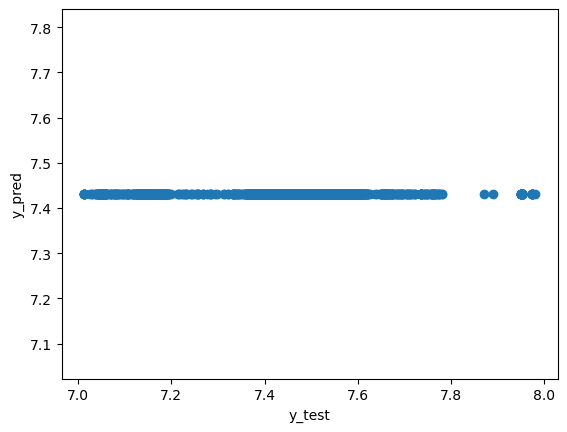

In [290]:
#Dummy Model
dum = DummyRegressor()
mse_dum,r2_dum=test_model(dum, X_train, y_train, X_test,y_test)

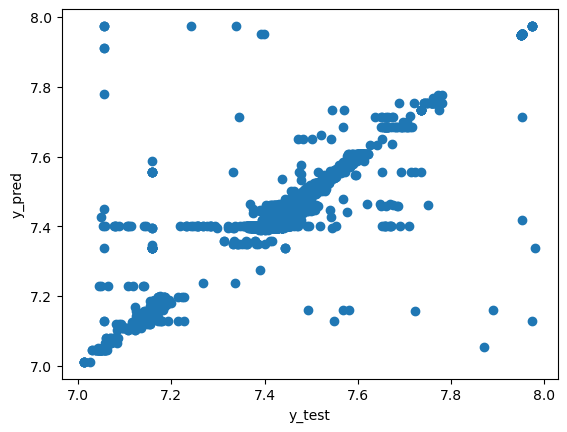

In [291]:
dtr = DecisionTreeRegressor(max_depth=10,random_state=1)
mse_dtr,r2_dtr=test_model(dtr, X_train, y_train, X_test,y_test)

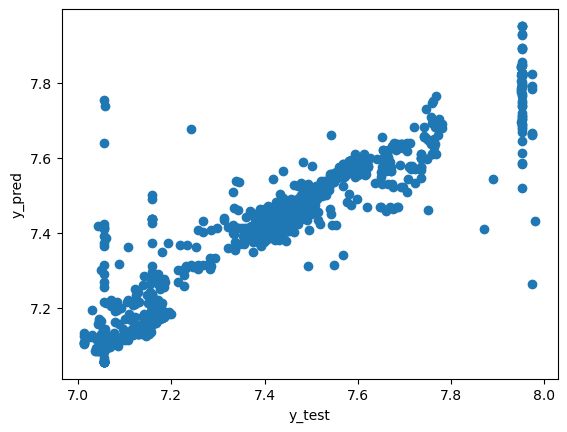

In [292]:
rdf = RandomForestRegressor(n_estimators=20,max_depth=10,max_features='sqrt',random_state=1)
mse_rdf,r2_rdf=test_model(rdf, X_train, y_train, X_test,y_test)

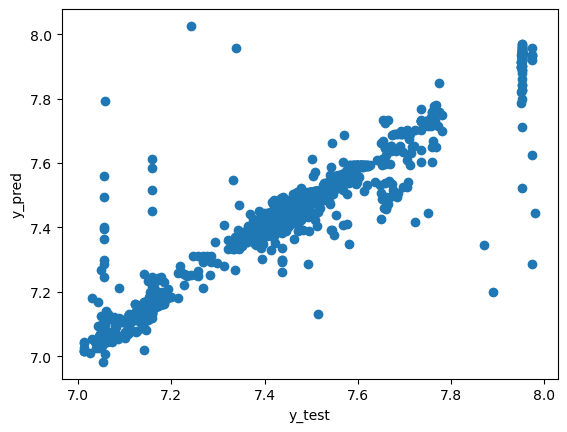

In [293]:
xgbr = XGBRegressor(n_estimators=20,max_depth=10,random_state=1)
mse_xgbr,r2_xgbr=test_model(xgbr, X_train, y_train, X_test,y_test)

# Compare Results

In [294]:
modelLabels = [ 'Dummy Regression', 'Decision Tree', 'Random Forest','Gradient Boost']
MSEall= [mse_dum,mse_dtr,mse_rdf,mse_xgbr]
r2all= [r2_dum,r2_dtr,r2_rdf,r2_xgbr]
score_tab = pd.DataFrame(list(zip(modelLabels, MSEall, r2all)), 
               columns =['Algorithm','MSE', 'R2']) 


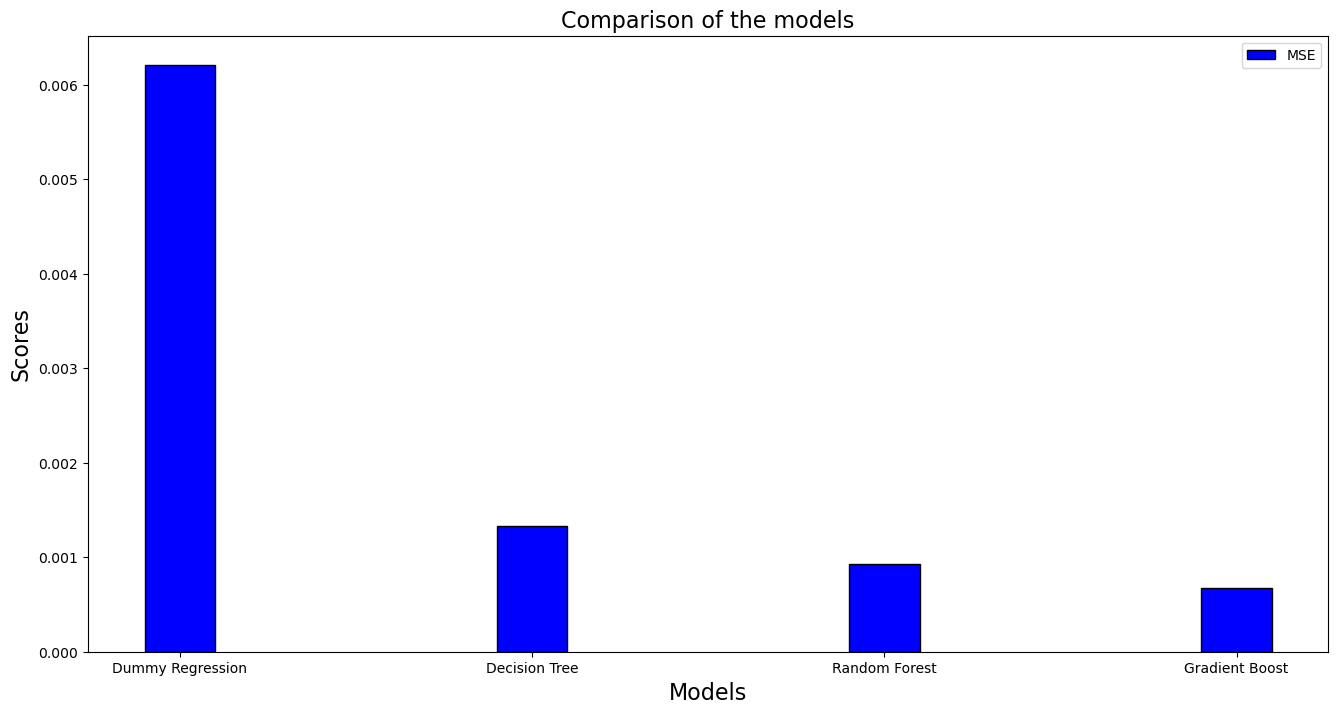

In [295]:
index1=[1,2,3,4]
index2=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(16,8))
plt.xlabel('Models',fontsize=16)
plt.ylabel ('Scores',fontsize=16)
plt.title('Comparison of the models',fontsize=16)
_=plt.bar(index1,MSEall,color='b',label='MSE',edgecolor='k',width=0.2)
plt.xticks([1,2,3,4], modelLabels)
plt.legend()
plt.savefig("MSECompare.png")
plt.show()

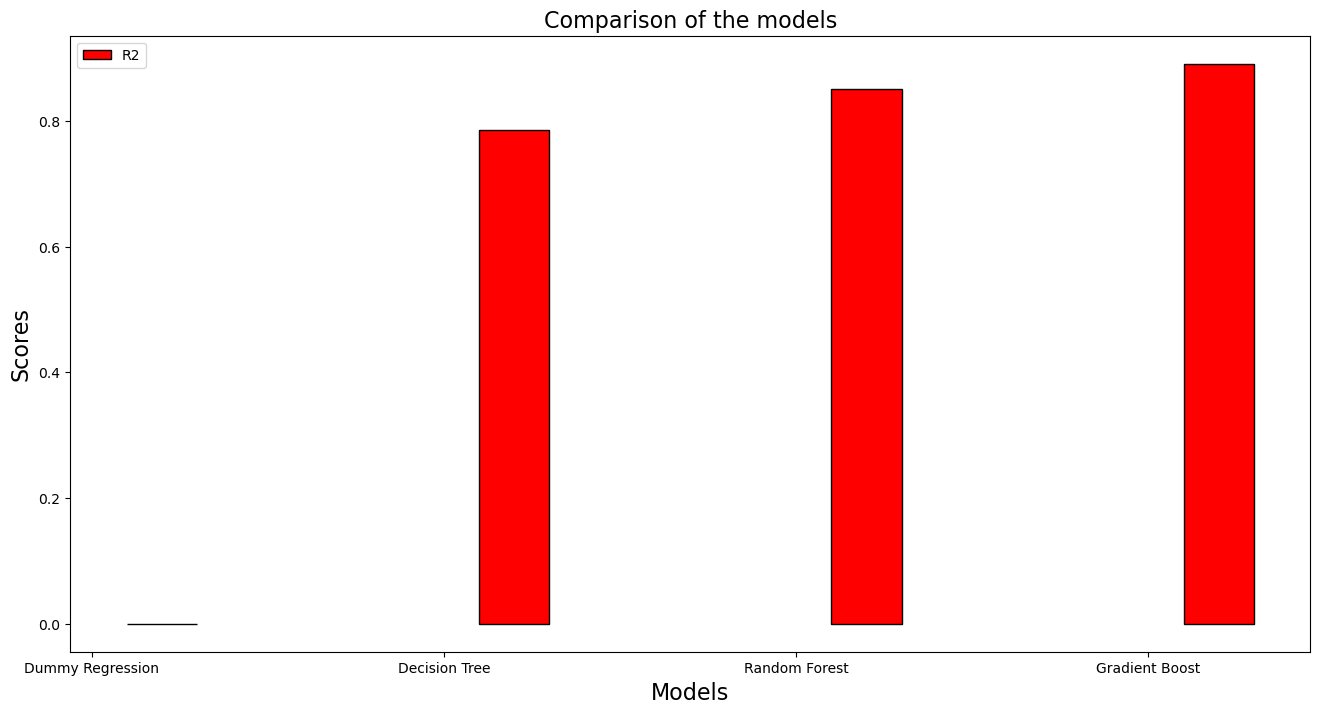

In [296]:
index1=[1,2,3,4]
index2=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(16,8))
plt.xlabel('Models',fontsize=16)
plt.ylabel ('Scores',fontsize=16)
plt.title('Comparison of the models',fontsize=16)
_=plt.bar(index2,r2all,color='r',label='R2',edgecolor='k',width=0.2)
plt.xticks([1,2,3,4], modelLabels)
plt.legend()
plt.savefig("R2Compare.png")
plt.show()

# From All Models

In [297]:
mse_lgbm=0.02060554783189559
r2_lgbm=0.9022906374241988

In [298]:
mse_mtlr=0.0424973799789952
r2_mtlr=0.542

In [299]:
modelLabels = [ 'Dummy Regression','Multiple Linear Regression', 'Decision Tree', 'Random Forest','Gradient Boost','Light Gradient Boost']
MSEall= [mse_dum,mse_mtlr,mse_dtr,mse_rdf,mse_xgbr,mse_lgbm]
r2all= [r2_dum,r2_mtlr,r2_dtr,r2_rdf,r2_xgbr,r2_lgbm]
score_tab = pd.DataFrame(list(zip(modelLabels, MSEall, r2all)), 
               columns =['Algorithm','MSE', 'R2']) 


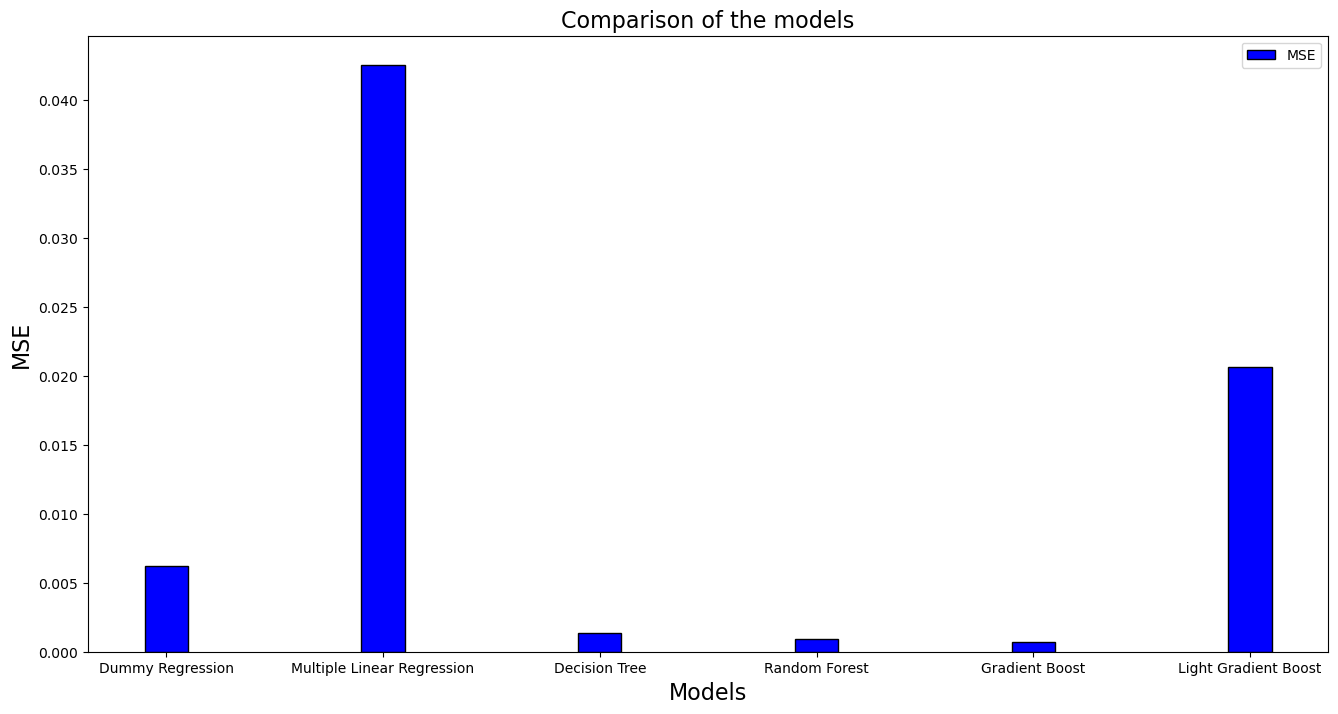

In [300]:
index1=[1,2,3,4,5,6]
index2=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(16,8))
plt.xlabel('Models',fontsize=16)
plt.ylabel ('MSE',fontsize=16)
plt.title('Comparison of the models',fontsize=16)
_=plt.bar(index1,MSEall,color='b',label='MSE',edgecolor='k',width=0.2)
plt.xticks([1,2,3,4,5,6], modelLabels)
plt.legend()
plt.savefig("MSECompare.png")
plt.show()

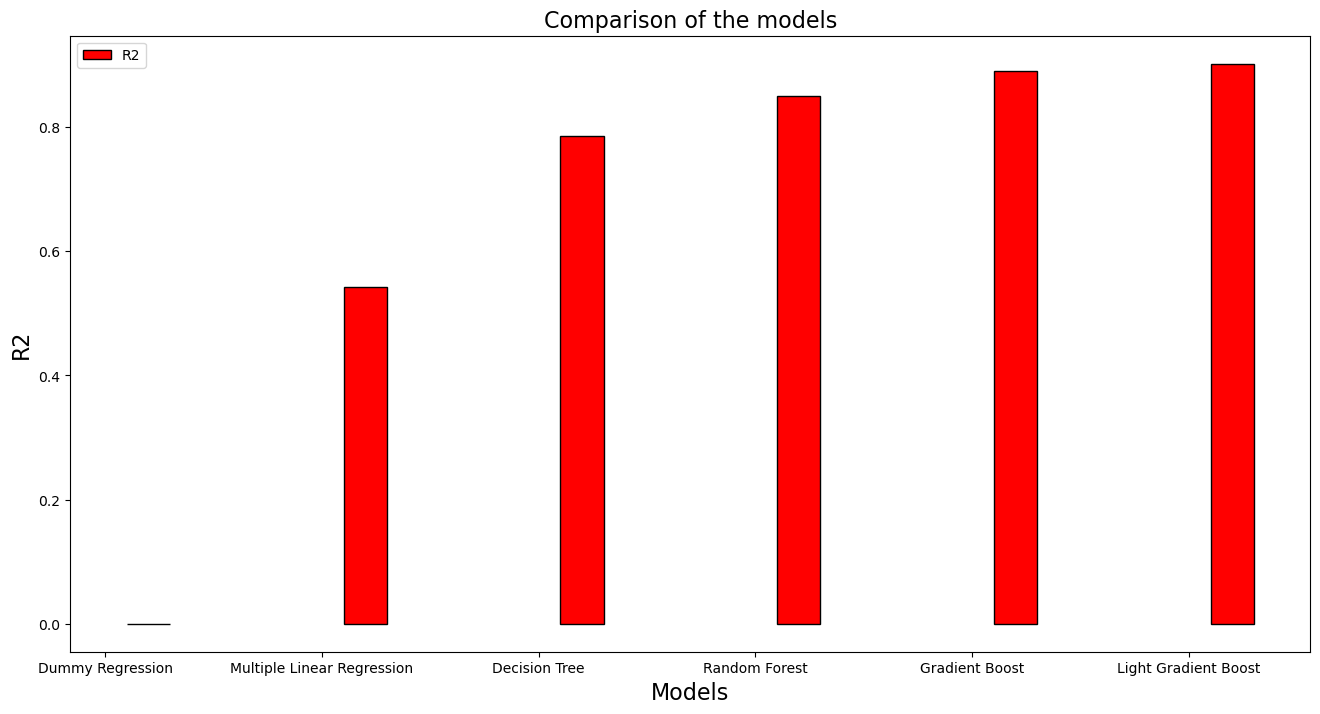

In [301]:
index1=[1,2,3,4,5,6]
index2=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(16,8))
plt.xlabel('Models',fontsize=16)
plt.ylabel ('R2',fontsize=16)
plt.title('Comparison of the models',fontsize=16)
_=plt.bar(index2,r2all,color='r',label='R2',edgecolor='k',width=0.2)
plt.xticks([1,2,3,4,5,6], modelLabels)
plt.legend()
plt.savefig("R2Compare.png")
plt.show()

# Grid Search

In [302]:
GB = XGBRegressor()
gb_param = {
        'n_estimators' : [20,40,60],
        'learning_rate': [0.1, 0.03],
        'max_depth': [5,10,15],
        'subsample': [0.6],
        'colsample_bytree': [0.6] ,
        'reg_alpha':[0,1]
        }

gsGB = GridSearchCV(GB, param_grid = gb_param,cv=2,  scoring="r2", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.8222211016153426


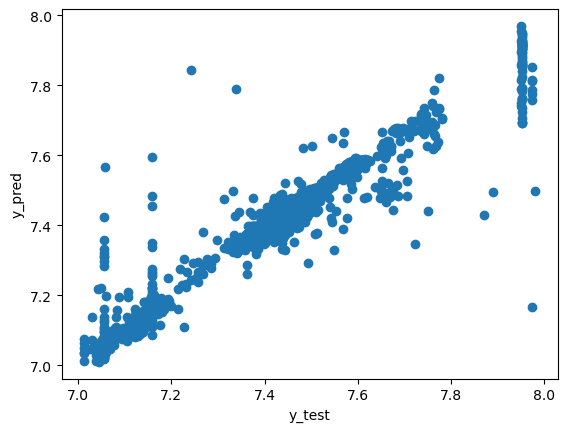

In [303]:
xgbr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1,
             monotone_constraints='()', n_estimators=60, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)
mse_xgbr,r2_xgbr=test_model(xgbr, X_train, y_train, X_test,y_test)

In [304]:
mse_xgbr

0.0007122352494697081

In [305]:
r2_xgbr

0.8852306552492464